In [1]:
import os, sys
import warnings

main_path = os.getcwd()

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# Data manipulation
import numpy as np
import pandas as pd
#import datetime
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import jarque_bera
from scipy.stats import t
import statsmodels.api as sm
import statsmodels.tsa.api as smt
#from arch import arch_model

# Plotting
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

# Statistical manipulation
from scipy.stats import norm

# Tabulate data
from tabulate import tabulate

#df_vda = pd.read_csv(os.path.join(main_path, r"Bases\\VDA\\OFER_VDA_20180731.csv"))

In [3]:
df_cpa = pd.DataFrame()
period = [(7,11),(7,13),(7,20),(7,25),(7,31), (7, 6), (7, 13), 
          (8,22),(8,28),(8,10),(8,14),(8,16),(8,21),(8,31),(8,7), 
          (9,6),(9,21),(9,5), (9,11),(9,14),(9,24),(9,27)
          #(10,26),(10,22),(10,5),(10,16),(10,29),(10,30),(10,8), 
          #(11,22),(11,14),(11,16)
         ]
for per in period:
    mth, day = per
    load_path = "Bases\\CPA\\OFER_CPA_2018{}{}.txt".format(str(mth).zfill(2), str(day).zfill(2))
    load_path = os.path.join(main_path, load_path)
    print(load_path)
    df_temp = pd.read_csv(load_path)
    df_cpa = pd.concat([df_cpa, df_temp])

C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180711.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180713.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180720.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180725.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180731.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180706.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180713.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180822.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180828.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180810.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180814.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180816.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180821.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180

In [4]:
SUZB3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='SUZB3                                             ']
SUZB3 = SUZB3.sort_values(by=['Hora_Prioridade'])

MGLU3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='MGLU3                                             ']
MGLU3 = MGLU3.sort_values(by=['Hora_Prioridade'])

FIBR3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='FIBR3                                             ']
FIBR3 = FIBR3.sort_values(by=['Hora_Prioridade'])

BTOW3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='BTOW3                                             ']
BTOW3 = BTOW3.sort_values(by=['Hora_Prioridade'])

VALE3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='VALE3                                             ']
VALE3 = VALE3.sort_values(by=['Hora_Prioridade'])

BRKM5 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='BRKM5                                             ']
BRKM5 = BRKM5.sort_values(by=['Hora_Prioridade'])

EMBR3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='EMBR3                                             ']
EMBR3 = EMBR3.sort_values(by=['Hora_Prioridade'])

PETR4 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='PETR4                                             ']
PETR4 = PETR4.sort_values(by=['Hora_Prioridade'])

CPFE3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='CPFE3                                             ']
CPFE3 = CPFE3.sort_values(by=['Hora_Prioridade'])

KLBN4 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='KLBN4                                             ']
KLBN4 = KLBN4.sort_values(by=['Hora_Prioridade'])

BRFS3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='BRFS3                                             ']
BRFS3 = BRFS3.sort_values(by=['Hora_Prioridade'])

KROT3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='KROT3                                             ']
KROT3 = KROT3.sort_values(by=['Hora_Prioridade'])

ELET6 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='ELET6                                             ']
ELET6 = ELET6.sort_values(by=['Hora_Prioridade'])

QUAL3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='QUAL3                                             ']
QUAL3 = QUAL3.sort_values(by=['Hora_Prioridade'])

UGPA3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='UGPA3                                             ']
UGPA3 = UGPA3.sort_values(by=['Hora_Prioridade'])

ECOR3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='ECOR3                                             ']
ECOR3 = ECOR3.sort_values(by=['Hora_Prioridade'])

ELET3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='ELET3                                             ']
ELET3 = ELET3.sort_values(by=['Hora_Prioridade'])

CCRO3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='CCRO3                                             ']
CCRO3 = CCRO3.sort_values(by=['Hora_Prioridade'])

SBSP3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='SBSP3                                             ']
SBSP3 = SBSP3.sort_values(by=['Hora_Prioridade'])

GOLL4 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='GOLL4                                             ']
GOLL4 = GOLL4.sort_values(by=['Hora_Prioridade'])
#GOLL4['return'] = GOLL4.Preço_Of_Compra.pct_change()
#is_inf = GOLL4['return'].iloc[:] == np.inf
#GOLL4['return'] = GOLL4['return'].loc[~is_inf, ]
#mean_GOLL4 = np.mean(GOLL4['return'])
#std_GOLL4 = np.std(GOLL4['return'])


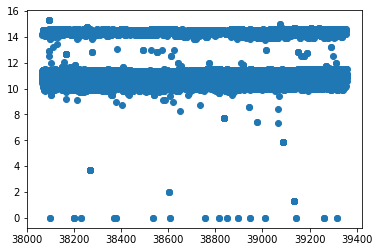

In [15]:
plt.scatter(GOLL4['seconds'][35000:60846], GOLL4['Preço_Of_Compra'][35000:60846])

In [5]:
# Transforma para segundos o horario de prioridade
def time_to_second(data):
    data['parts'] = data['Hora_Prioridade'].apply(lambda x: x.split(':'))
    data['seconds'] = data['parts'].apply(lambda x: round(int(x[0])*(60*60) + int(x[1])*60 + float(x[2])))
    data_morning = data[ data['seconds'] < 35125 ]
    data_night = data[ data['seconds'] > 60846 ]
    data.drop(data_night.index, axis=0, inplace = True, errors='ignore')
    data.drop(data_morning.index, axis=0, inplace = True, errors='ignore')

# calcula a media de preco da acao num intervalo de 5minutos    
def media_temp(data, gran = 300):
    init = data['seconds'].iloc[0]
    end = data['seconds'].iloc[-1]
    lista = []
    media = []
    for i in range(len(data)):
        if data['seconds'].iloc[i] - init <= gran:
            lista.append(data['Preço_Of_Compra'].iloc[i])
        else:
            media.append(np.sum(lista) / len(lista))
            lista = []
            init = data['seconds'].iloc[i]
    
    headers = ['mean']
    
    df = pd.DataFrame(data = media, columns = headers)
    df['return'] = df['mean'].pct_change()
        
    return df

In [6]:
# SUZB3
time_to_second(SUZB3)
SUZB3      = media_temp(SUZB3)
mean_SUZB3 = np.mean(SUZB3['return'])
std_SUZB3  = np.std(SUZB3['return'])

# MGLU3
time_to_second(MGLU3)
MGLU3      = media_temp(MGLU3)
mean_MGLU3 = np.mean(MGLU3['return'])
std_MGLU3  = np.std(MGLU3['return'])

# FIBR3
time_to_second(FIBR3)
FIBR3      = media_temp(FIBR3)
mean_FIBR3 = np.mean(FIBR3['return'])
std_FIBR3  = np.std(FIBR3['return'])

# BTOW3
time_to_second(BTOW3)
BTOW3      = media_temp(BTOW3)
mean_BTOW3 = np.mean(BTOW3['return'])
std_BTOW3  = np.std(BTOW3['return'])

# VALE3
time_to_second(VALE3)
VALE3      = media_temp(VALE3)
mean_VALE3 = np.mean(VALE3['return'])
std_VALE3  = np.std(VALE3['return'])

# BRKM5
time_to_second(BRKM5)
BRKM5      = media_temp(BRKM5)
mean_BRKM5 = np.mean(BRKM5['return'])
std_BRKM5  = np.std(BRKM5['return'])

# EMBR3
time_to_second(EMBR3)
EMBR3      = media_temp(EMBR3)
mean_EMBR3 = np.mean(EMBR3['return'])
std_EMBR3  = np.std(EMBR3['return'])

# PETR4
time_to_second(PETR4)
PETR4      = media_temp(PETR4)
mean_PETR4 = np.mean(PETR4['return'])
std_PETR4  = np.std(PETR4['return'])

# CPFE3
time_to_second(CPFE3)
CPFE3      = media_temp(CPFE3)
mean_CPFE3 = np.mean(CPFE3['return'])
std_CPFE3  = np.std(CPFE3['return'])

# KLBN4
time_to_second(KLBN4)
KLBN4      = media_temp(KLBN4)
mean_KLBN4 = np.mean(KLBN4['return'])
std_KLBN4  = np.std(KLBN4['return'])

# BRFS3
time_to_second(BRFS3)
BRFS3      = media_temp(BRFS3)
mean_BRFS3 = np.mean(BRFS3['return'])
std_BRFS3  = np.std(BRFS3['return'])

# KROT3
time_to_second(KROT3)
KROT3      = media_temp(KROT3)
mean_KROT3 = np.mean(KROT3['return'])
std_KROT3  = np.std(KROT3['return'])

# ELET6
time_to_second(ELET6)
ELET6      = media_temp(ELET6)
mean_ELET6 = np.mean(ELET6['return'])
std_ELET6  = np.std(ELET6['return'])

# QUAL3
time_to_second(QUAL3)
QUAL3      = media_temp(QUAL3)
mean_QUAL3 = np.mean(QUAL3['return'])
std_QUAL3  = np.std(QUAL3['return'])

# UGPA3
time_to_second(UGPA3)
UGPA3      = media_temp(UGPA3)
mean_UGPA3 = np.mean(UGPA3['return'])
std_UGPA3  = np.std(UGPA3['return'])

# ECOR3
time_to_second(ECOR3)
ECOR3      = media_temp(ECOR3)
mean_ECOR3 = np.mean(ECOR3['return'])
std_ECOR3  = np.std(ECOR3['return'])

# ELET3
time_to_second(ELET3)
ELET3      = media_temp(ELET3)
mean_ELET3 = np.mean(ELET3['return'])
std_ELET3  = np.std(ELET3['return'])

# CCRO3
time_to_second(CCRO3)
CCRO3      = media_temp(CCRO3)
mean_CCRO3 = np.mean(CCRO3['return'])
std_CCRO3  = np.std(CCRO3['return'])

# SBSP3
time_to_second(SBSP3)
SBSP3      = media_temp(SBSP3)
mean_SBSP3 = np.mean(SBSP3['return'])
std_SBSP3  = np.std(SBSP3['return'])

# GOLL4
time_to_second(GOLL4)
GOLL4      = media_temp(GOLL4)
mean_GOLL4 = np.mean(GOLL4['return'])
std_GOLL4  = np.std(GOLL4['return'])

## Stationarity and correlations test/plots

In [7]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

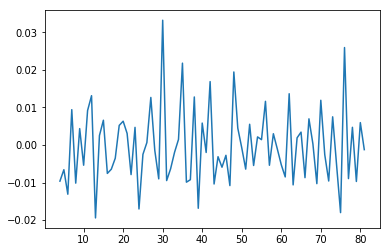

In [10]:
plt.plot(MGLU3['return'][4:])

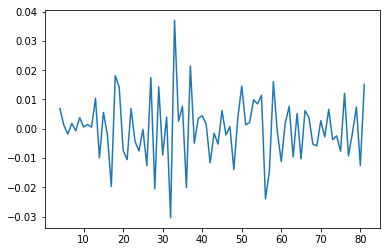

In [11]:
plt.plot(PETR4['return'][4:])

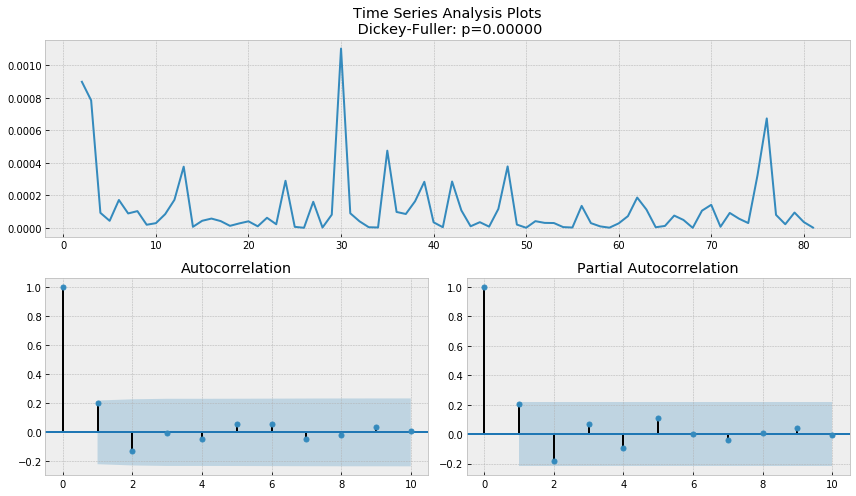

In [9]:
squared_data = MGLU3['return'][2:].apply(lambda x: x**2)
tsplot(squared_data,lags=10)

In [22]:
best = [
SUZB3,
MGLU3,
FIBR3,
BTOW3,
VALE3,
BRKM5,
EMBR3,
PETR4,
CPFE3,
KLBN4]

worst = [
BRFS3,
KROT3,
ELET6,
QUAL3,
UGPA3,
ECOR3,
ELET3,
CCRO3,
SBSP3,
GOLL4]

C:\Users\vipac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  This is separate from the ipykernel package so we can avoid doing imports until


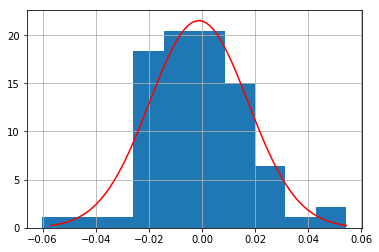

In [25]:
GOLL4['return'].hist(bins = 10, histtype = 'stepfilled', alpha = 1,density = True)
x = np.linspace(mean_GOLL4 - 3*std_GOLL4, mean_GOLL4 + 3*std_GOLL4,100)
plt.plot(x,mlab.normpdf(x, mean_GOLL4,std_GOLL4),"r")
plt.show()

C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

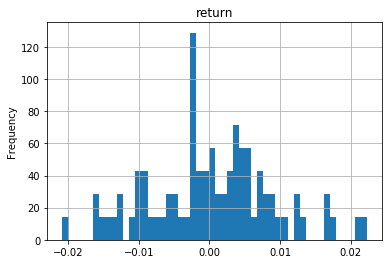

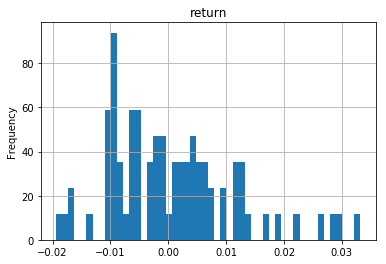

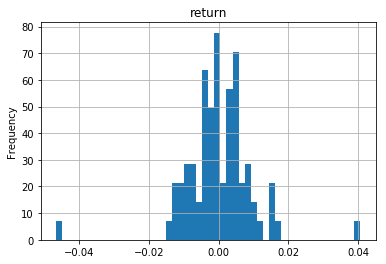

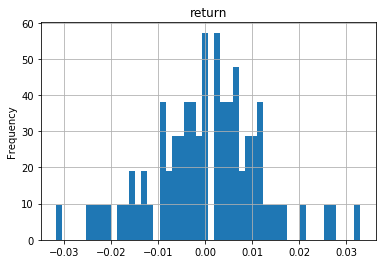

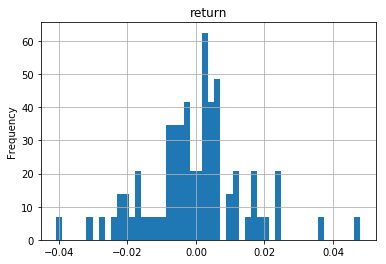

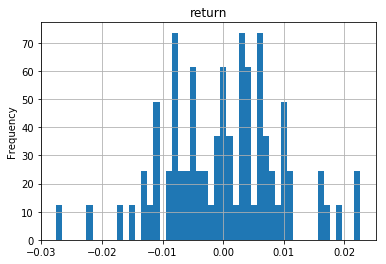

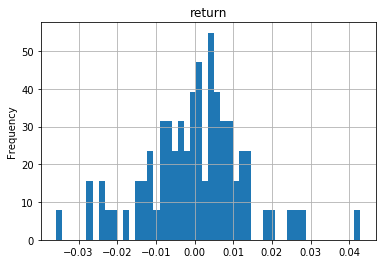

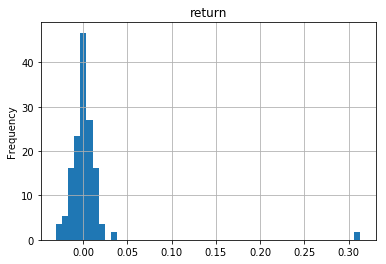

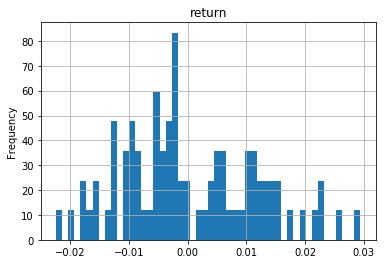

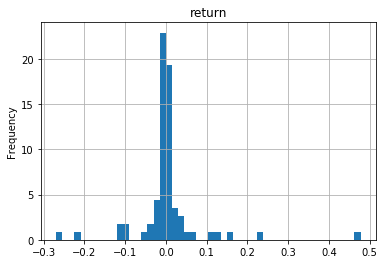

In [28]:
for i in best:
    i.hist(column = 'return', bins = 50, normed = True, histtype = 'stepfilled', alpha = 1, label = 'i')
    plt.ylabel('Frequency')

C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

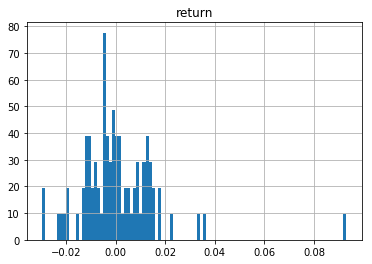

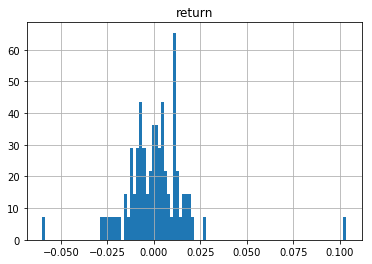

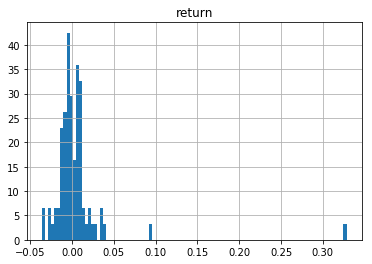

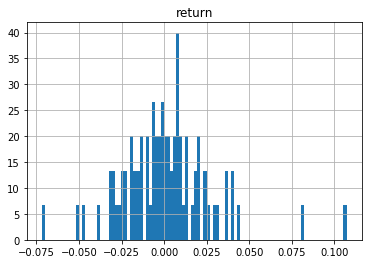

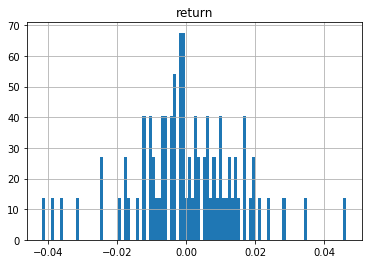

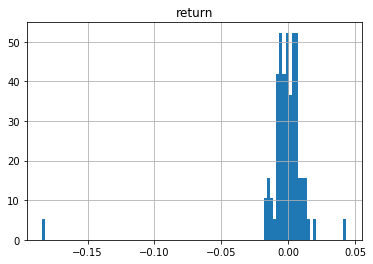

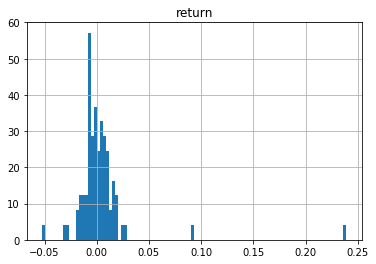

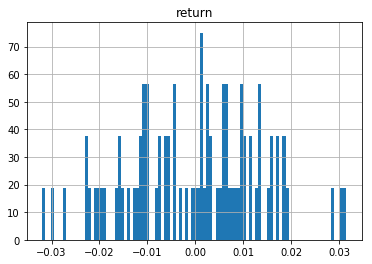

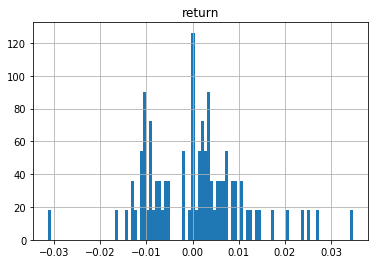

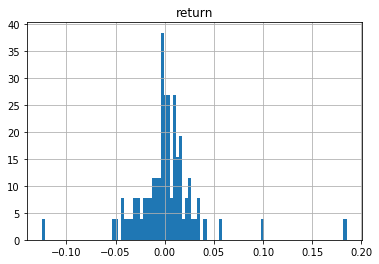

In [71]:
for i in worst:
    i.hist(column = 'return', bins = 100, normed = True, histtype = 'stepfilled', alpha = 1, label = i)

In [14]:
VaR_90 = [
norm.ppf(1-0.9, mean_SUZB3, std_SUZB3),
norm.ppf(1-0.9, mean_MGLU3, std_MGLU3),
norm.ppf(1-0.9, mean_FIBR3, std_FIBR3),
norm.ppf(1-0.9, mean_BTOW3, std_BTOW3),
norm.ppf(1-0.9, mean_VALE3, std_VALE3),
norm.ppf(1-0.9, mean_BRKM5, std_BRKM5),
norm.ppf(1-0.9, mean_EMBR3, std_EMBR3),
norm.ppf(1-0.9, mean_PETR4, std_PETR4),
norm.ppf(1-0.9, mean_CPFE3, std_CPFE3),
norm.ppf(1-0.9, mean_KLBN4, std_KLBN4),
norm.ppf(1-0.9, mean_BRFS3, std_BRFS3),
norm.ppf(1-0.9, mean_KROT3, std_KROT3),
norm.ppf(1-0.9, mean_ELET6, std_ELET6),
norm.ppf(1-0.9, mean_QUAL3, std_QUAL3),
norm.ppf(1-0.9, mean_UGPA3, std_UGPA3),
norm.ppf(1-0.9, mean_ECOR3, std_ECOR3),
norm.ppf(1-0.9, mean_ELET3, std_ELET3),
norm.ppf(1-0.9, mean_CCRO3, std_CCRO3),
norm.ppf(1-0.9, mean_SBSP3, std_SBSP3),
norm.ppf(1-0.9, mean_GOLL4, std_GOLL4)]

VaR_95 = [
norm.ppf(1-0.95, mean_SUZB3, std_SUZB3),
norm.ppf(1-0.95, mean_MGLU3, std_MGLU3),
norm.ppf(1-0.95, mean_FIBR3, std_FIBR3),
norm.ppf(1-0.95, mean_BTOW3, std_BTOW3),
norm.ppf(1-0.95, mean_VALE3, std_VALE3),
norm.ppf(1-0.95, mean_BRKM5, std_BRKM5),
norm.ppf(1-0.95, mean_EMBR3, std_EMBR3),
norm.ppf(1-0.95, mean_PETR4, std_PETR4),
norm.ppf(1-0.95, mean_CPFE3, std_CPFE3),
norm.ppf(1-0.95, mean_KLBN4, std_KLBN4),
norm.ppf(1-0.95, mean_BRFS3, std_BRFS3),
norm.ppf(1-0.95, mean_KROT3, std_KROT3),
norm.ppf(1-0.95, mean_ELET6, std_ELET6),
norm.ppf(1-0.95, mean_QUAL3, std_QUAL3),
norm.ppf(1-0.95, mean_UGPA3, std_UGPA3),
norm.ppf(1-0.95, mean_ECOR3, std_ECOR3),
norm.ppf(1-0.95, mean_ELET3, std_ELET3),
norm.ppf(1-0.95, mean_CCRO3, std_CCRO3),
norm.ppf(1-0.95, mean_SBSP3, std_SBSP3),
norm.ppf(1-0.95, mean_GOLL4, std_GOLL4)
]

print(tabulate([['90%', VaR_90[0], VaR_90[1], VaR_90[2], VaR_90[3], VaR_90[4], VaR_90[5], VaR_90[6], VaR_90[7], VaR_90[8], VaR_90[9]],
                ['95%', VaR_95[0], VaR_95[1], VaR_95[2], VaR_95[3], VaR_95[4], VaR_95[5], VaR_95[6], VaR_95[7], VaR_95[8], VaR_95[9]]], 
               headers = ['CL_best', 'SUZB3', 'MGLU3','FIBR3', 'BTOW3', 'VALE3', 'BRKM5', 'EMBR3','PETR4', 'CPFE3', 'KLBN4']))



print(tabulate([['90%', VaR_90[10], VaR_90[11], VaR_90[12], VaR_90[13], VaR_90[14], VaR_90[15], VaR_90[16], VaR_90[17], VaR_90[18], VaR_90[19]],
                ['95%', VaR_95[10], VaR_95[11], VaR_95[12], VaR_95[13], VaR_95[14], VaR_95[15], VaR_95[16], VaR_95[17], VaR_95[18], VaR_95[19]]], 
               headers = ['CL_worst', 'BRFS3', 'KROT3','ELET6', 'QUAL3', 'UGPA3', 'ECOR3', 'ELET3','CCRO3', 'SBSP3', 'GOLL4']))

CL_best         SUZB3       MGLU3       FIBR3       BTOW3       VALE3       BRKM5       EMBR3       PETR4       CPFE3      KLBN4
---------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ---------
90%        -0.0109874  -0.0134609  -0.0123889  -0.0148511  -0.01864    -0.0119528  -0.0167137  -0.0423535  -0.0142915  -0.102872
95%        -0.0141866  -0.0174309  -0.0159267  -0.0191083  -0.0238337  -0.0153841  -0.0214617  -0.055525   -0.018482   -0.132875
CL_worst         BRFS3       KROT3       ELET6       QUAL3       UGPA3       ECOR3       ELET3       CCRO3       SBSP3       GOLL4
----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
90%         -0.0143098  -0.0137846  -0.0144916  -0.0188549  -0.0155681  -0.009741   -0.0150328  -0.0166908  -0.0125037  -0.0249177
95%         -0.0182542  -0.0178157  -0.0187023  -0.0241639  -0.0200555  -0.0124696  -0.0193

In [ ]:
for i in best:
    i.sort_values('return', inplace = True, ascending = True)

In [15]:
kurto_index = []
for i in best:
    kurto_index.append(kurtosis(i['return'][1:]))
for i in worst:
    kurto_index.append(kurtosis(i['return'][1:]))

skew_index = []
for i in best:
    skew_index.append(skew(i['return'][1:]))
for i in worst:
    skew_index.append(skew(i['return'][1:]))
    

    
print(tabulate([['Kurtosis index', kurto_index[0], kurto_index[1], kurto_index[2], kurto_index[3], kurto_index[4], kurto_index[5], kurto_index[6], kurto_index[7], kurto_index[8], kurto_index[9]],
                ['skew index', skew_index[0], skew_index[1], skew_index[2], skew_index[3], skew_index[4], skew_index[5], skew_index[6], skew_index[7], skew_index[8], skew_index[9]]], 
               headers = ['Index best', 'SUZB3', 'MGLU3','FIBR3', 'BTOW3', 'VALE3', 'BRKM5', 'EMBR3','PETR4', 'CPFE3', 'KLBN4']))


print(tabulate([['Kurtosis index ', kurto_index[10], kurto_index[11], kurto_index[12], kurto_index[13], kurto_index[14], kurto_index[15], kurto_index[16], kurto_index[17], kurto_index[18], kurto_index[19]],
                ['skew index', skew_index[10], skew_index[11], skew_index[12], skew_index[13], skew_index[14], skew_index[15], skew_index[16], skew_index[17], skew_index[18], skew_index[19]]], 
               headers = ['Index worst', 'BRFS3', 'KROT3','ELET6', 'QUAL3', 'UGPA3', 'ECOR3', 'ELET3','CCRO3', 'SBSP3', 'GOLL4']))

Index best           SUZB3     MGLU3      FIBR3       BTOW3     VALE3       BRKM5     EMBR3     PETR4      CPFE3     KLBN4
--------------  ----------  --------  ---------  ----------  --------  ----------  --------  --------  ---------  --------
Kurtosis index  -0.0651378  0.586335   8.03567    0.472158   1.36015    0.262522   1.02907   62.3685   -0.533398  14.7005
skew index       0.0789801  0.813547  -0.383443  -0.0600435  0.215878  -0.0927288  0.066129   7.63169   0.329272   2.08345
Index worst        BRFS3    KROT3      ELET6     QUAL3      UGPA3       ECOR3      ELET3      CCRO3     SBSP3     GOLL4
--------------  --------  -------  ---------  --------  ---------  ----------  ---------  ---------  --------  --------
Kurtosis index  0.741166  4.52878   0.203744  0.398627  0.0736922   0.274005    1.47255   0.641114   1.19971   1.26021
skew index      0.300406  1.27001  -0.202294  0.335158  0.0855363  -0.0230074  -0.755522  0.0811646  0.103545  0.232782


In [12]:
VaR_99 = [
norm.ppf(1-0.99, mean_SUZB3, std_SUZB3),
norm.ppf(1-0.99, mean_MGLU3, std_MGLU3),
norm.ppf(1-0.99, mean_FIBR3, std_FIBR3),
norm.ppf(1-0.99, mean_BTOW3, std_BTOW3),
norm.ppf(1-0.99, mean_VALE3, std_VALE3),
norm.ppf(1-0.99, mean_BRKM5, std_BRKM5),
norm.ppf(1-0.99, mean_EMBR3, std_EMBR3),
norm.ppf(1-0.99, mean_PETR4, std_PETR4),
norm.ppf(1-0.99, mean_CPFE3, std_CPFE3),
norm.ppf(1-0.99, mean_KLBN4, std_KLBN4),
norm.ppf(1-0.99, mean_BRFS3, std_BRFS3),
norm.ppf(1-0.99, mean_KROT3, std_KROT3),
norm.ppf(1-0.99, mean_ELET6, std_ELET6),
norm.ppf(1-0.99, mean_QUAL3, std_QUAL3),
norm.ppf(1-0.99, mean_UGPA3, std_UGPA3),
norm.ppf(1-0.99, mean_ECOR3, std_ECOR3),
norm.ppf(1-0.99, mean_ELET3, std_ELET3),
norm.ppf(1-0.99, mean_CCRO3, std_CCRO3),
norm.ppf(1-0.99, mean_SBSP3, std_SBSP3),
norm.ppf(1-0.99, mean_GOLL4, std_GOLL4)
]

In [30]:
print(np.array(VaR_99) - np.array(VaR_95))


[-0.00600116 -0.00744707 -0.00663635 -0.00798565 -0.00974263 -0.00643662
 -0.00890653 -0.02470745 -0.00786073 -0.05628083 -0.00739897 -0.00756179
 -0.00789861 -0.0099588  -0.00841757 -0.0051184  -0.00801158 -0.00896124
 -0.00661947 -0.01263933]


In [20]:
myList = list(np.around(np.array(skew_index),2))
myList

[0.08,
 0.81,
 -0.38,
 -0.06,
 0.22,
 -0.09,
 0.07,
 7.63,
 0.33,
 2.08,
 0.3,
 1.27,
 -0.2,
 0.34,
 0.09,
 -0.02,
 -0.76,
 0.08,
 0.1,
 0.23]

In [13]:
JB_index = []
for i in best:
    JB_index.append(jarque_bera(i['return'][1:]))
for i in worst:
    JB_index.append(jarque_bera(i['return'][1:]))

jar = list(np.around(np.array(JB_index),2))
jar

[array([0.1 , 0.95]),
 array([1.01e+01, 1.00e-02]),
 array([219.92,   0.  ]),
 array([0.8 , 0.67]),
 array([6.87, 0.03]),
 array([0.35, 0.84]),
 array([3.63, 0.16]),
 array([13914.43,     0.  ]),
 array([2.42, 0.3 ]),
 array([739.31,   0.  ]),
 array([3.07, 0.22]),
 array([91.,  0.]),
 array([0.69, 0.71]),
 array([2.05, 0.36]),
 array([0.12, 0.94]),
 array([0.26, 0.88]),
 array([15.02,  0.  ]),
 array([1.48, 0.48]),
 array([5.  , 0.08]),
 array([6.09, 0.05])]

In [ ]:
jarque_bera

In [17]:
kurto_index = []
for i in best:
    kurto_index.append(kurtosis(i['return'][1:]))
for i in worst:
    kurto_index.append(kurtosis(i['return'][1:]))

skew_index = []
for i in best:
    skew_index.append(skew(i['return'][1:]))
for i in worst:
    skew_index.append(skew(i['return'][1:]))

print(tabulate([['Kurtosis index', kurto_index[0], kurto_index[1], kurto_index[2], kurto_index[3], kurto_index[4], kurto_index[5], kurto_index[6], kurto_index[7], kurto_index[8], kurto_index[9]],
                ['skew index', skew_index[0], skew_index[1], skew_index[2], skew_index[3], skew_index[4], skew_index[5], skew_index[6], skew_index[7], skew_index[8], skew_index[9]]], 
               headers = ['Index best', 'SUZB3', 'MGLU3','FIBR3', 'BTOW3', 'VALE3', 'BRKM5', 'EMBR3','PETR4', 'CPFE3', 'KLBN4']))


print(tabulate([['Kurtosis index ', kurto_index[10], kurto_index[11], kurto_index[12], kurto_index[13], kurto_index[14], kurto_index[15], kurto_index[16], kurto_index[17], kurto_index[18], kurto_index[19]],
                ['skew index', skew_index[10], skew_index[11], skew_index[12], skew_index[13], skew_index[14], skew_index[15], skew_index[16], skew_index[17], skew_index[18], skew_index[19]]], 
               headers = ['Index worst', 'BRFS3', 'KROT3','ELET6', 'QUAL3', 'UGPA3', 'ECOR3', 'ELET3','CCRO3', 'SBSP3', 'GOLL4']))

Index best           SUZB3     MGLU3      FIBR3       BTOW3     VALE3       BRKM5     EMBR3     PETR4      CPFE3     KLBN4
--------------  ----------  --------  ---------  ----------  --------  ----------  --------  --------  ---------  --------
Kurtosis index  -0.0651378  0.586335   8.03567    0.472158   1.36015    0.262522   1.02907   62.3685   -0.533398  14.7005
skew index       0.0789801  0.813547  -0.383443  -0.0600435  0.215878  -0.0927288  0.066129   7.63169   0.329272   2.08345
Index worst        BRFS3    KROT3      ELET6     QUAL3      UGPA3       ECOR3      ELET3      CCRO3     SBSP3     GOLL4
--------------  --------  -------  ---------  --------  ---------  ----------  ---------  ---------  --------  --------
Kurtosis index  0.741166  4.52878   0.203744  0.398627  0.0736922   0.274005    1.47255   0.641114   1.19971   1.26021
skew index      0.300406  1.27001  -0.202294  0.335158  0.0855363  -0.0230074  -0.755522  0.0811646  0.103545  0.232782


In [34]:
skew_index

[2.97221914902826,
 7.83798617421526,
 9.095345767968416,
 7.5785125097132156,
 8.179338213573075,
 8.076985573035808,
 9.364864893708233,
 8.918333344223203,
 1.4044594133120059,
 7.970508885407335,
 3.1629302974105746,
 6.73487854348844,
 9.267381727123757,
 5.966040284738411,
 9.136968310893097,
 8.267633894644744,
 2.9348926192611997,
 8.718768878776029,
 5.482778209981417,
 6.324950524942188]

# Expected Shortfall

In [18]:
# SUZB3
SUZB3.sort_values('return', inplace = True, ascending = True)

# MGLU3
MGLU3.sort_values('return', inplace = True, ascending = True)

# FIBR3
FIBR3.sort_values('return', inplace = True, ascending = True)

# BTOW3
BTOW3.sort_values('return', inplace = True, ascending = True)

# VALE3
VALE3.sort_values('return', inplace = True, ascending = True)

# BRKM5
BRKM5.sort_values('return', inplace = True, ascending = True)

# EMBR3
EMBR3.sort_values('return', inplace = True, ascending = True)

# PETR4
PETR4.sort_values('return', inplace = True, ascending = True)

# CPFE3
CPFE3.sort_values('return', inplace = True, ascending = True)

# KLBN4
KLBN4.sort_values('return', inplace = True, ascending = True)

# BRFS3
BRFS3.sort_values('return', inplace = True, ascending = True)

# KROT3
KROT3.sort_values('return', inplace = True, ascending = True)

# ELET6
ELET6.sort_values('return', inplace = True, ascending = True)

# QUAL3
QUAL3.sort_values('return', inplace = True, ascending = True)

# UGPA3
UGPA3.sort_values('return', inplace = True, ascending = True)

# ECOR3
ECOR3.sort_values('return', inplace = True, ascending = True)

# ELET3
ELET3.sort_values('return', inplace = True, ascending = True)

# CCRO3
CCRO3.sort_values('return', inplace = True, ascending = True)

# SBSP3
SBSP3.sort_values('return', inplace = True, ascending = True)

# GOLL4
GOLL4.sort_values('return', inplace = True, ascending = True)

In [32]:
ES_90 = [
SUZB3['return'].quantile(0.1),
MGLU3['return'].quantile(0.1),
FIBR3['return'].quantile(0.1),
BTOW3['return'].quantile(0.1),
VALE3['return'].quantile(0.1),
BRKM5['return'].quantile(0.1),
EMBR3['return'].quantile(0.1),
PETR4['return'].quantile(0.1),
CPFE3['return'].quantile(0.1),
KLBN4['return'].quantile(0.1),
BRFS3['return'].quantile(0.1),
KROT3['return'].quantile(0.1),
ELET6['return'].quantile(0.1),
QUAL3['return'].quantile(0.1),
UGPA3['return'].quantile(0.1),
ECOR3['return'].quantile(0.1),
ELET3['return'].quantile(0.1),
CCRO3['return'].quantile(0.1),
SBSP3['return'].quantile(0.1),
GOLL4['return'].quantile(0.1)    
]

ES_95 = [
SUZB3['return'].quantile(0.05),
MGLU3['return'].quantile(0.05),
FIBR3['return'].quantile(0.05),
BTOW3['return'].quantile(0.05),
VALE3['return'].quantile(0.05),
BRKM5['return'].quantile(0.05),
EMBR3['return'].quantile(0.05),
PETR4['return'].quantile(0.05),
CPFE3['return'].quantile(0.05),
KLBN4['return'].quantile(0.05),
BRFS3['return'].quantile(0.05),
KROT3['return'].quantile(0.05),
ELET6['return'].quantile(0.05),
QUAL3['return'].quantile(0.05),
UGPA3['return'].quantile(0.05),
ECOR3['return'].quantile(0.05),
ELET3['return'].quantile(0.05),
CCRO3['return'].quantile(0.05),
SBSP3['return'].quantile(0.05),
GOLL4['return'].quantile(0.05)    
]

print(tabulate([['90%', ES_90[0], ES_90[1], ES_90[2], ES_90[3], ES_90[4], ES_90[5], ES_90[6], ES_90[7], ES_90[8], ES_90[9]],
                ['95%', ES_95[0], ES_95[1], ES_95[2], ES_95[3], ES_95[4], ES_95[5], ES_95[6], ES_95[7], ES_95[8], ES_95[9]]], 
               headers = ['CL_best', 'SUZB3', 'MGLU3','FIBR3', 'BTOW3', 'VALE3', 'BRKM5', 'EMBR3','PETR4', 'CPFE3', 'KLBN4']))



print(tabulate([['90%', ES_90[10], ES_90[11], ES_90[12], ES_90[13], ES_90[14], ES_90[15], ES_90[16], ES_90[17], ES_90[18], ES_90[19]],
                ['95%', ES_95[10], ES_95[11], ES_95[12], ES_95[13], ES_95[14], ES_95[15], ES_95[16], ES_95[17], ES_95[18], ES_95[19]]], 
               headers = ['CL_worst', 'BRFS3', 'KROT3','ELET6', 'QUAL3', 'UGPA3', 'ECOR3', 'ELET3','CCRO3', 'SBSP3', 'GOLL4']))

CL_best         SUZB3       MGLU3        FIBR3       BTOW3       VALE3       BRKM5       EMBR3       PETR4       CPFE3       KLBN4
---------  ----------  ----------  -----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
90%        -0.0108423  -0.0102828  -0.00936724  -0.0153788  -0.0184463  -0.0111024  -0.0152978  -0.0125198  -0.0129294  -0.0375605
95%        -0.0142454  -0.0130963  -0.0117578   -0.0212845  -0.0220767  -0.0135105  -0.0237313  -0.0196914  -0.0167258  -0.105463
CL_worst         BRFS3       KROT3       ELET6       QUAL3       UGPA3       ECOR3       ELET3       CCRO3       SBSP3       GOLL4
----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
90%         -0.0144054  -0.0123521  -0.014162   -0.0205952  -0.0132505  -0.010043   -0.0114128  -0.0157303  -0.0108532  -0.0214092
95%         -0.0176017  -0.0143985  -0.0164153  -0.0233295  -0.0201347  -0.0119765  

In [31]:
ES_99 = [
SUZB3['return'].quantile(0.01),
MGLU3['return'].quantile(0.01),
FIBR3['return'].quantile(0.01),
BTOW3['return'].quantile(0.01),
VALE3['return'].quantile(0.01),
BRKM5['return'].quantile(0.01),
EMBR3['return'].quantile(0.01),
PETR4['return'].quantile(0.01),
CPFE3['return'].quantile(0.01),
KLBN4['return'].quantile(0.01),
BRFS3['return'].quantile(0.01),
KROT3['return'].quantile(0.01),
ELET6['return'].quantile(0.01),
QUAL3['return'].quantile(0.01),
UGPA3['return'].quantile(0.01),
ECOR3['return'].quantile(0.01),
ELET3['return'].quantile(0.01),
CCRO3['return'].quantile(0.01),
SBSP3['return'].quantile(0.01),
GOLL4['return'].quantile(0.01)    
]

In [33]:
print(np.array(ES_99) - np.array(ES_95))

[-0.00294411 -0.00518043 -0.00909218 -0.00466083 -0.01156789 -0.00965186
 -0.00511534 -0.00551959 -0.00384416 -0.12227211 -0.00545816 -0.00460659
 -0.00911512 -0.00581319 -0.00690552 -0.00629743 -0.01288474 -0.00498473
 -0.00600897 -0.01884176]


In [20]:
bestizero = [
'SUZB3',
'MGLU3',
'FIBR3',
'BTOW3',
'VALE3',
'BRKM5',
'EMBR3',
'PETR4',
'CPFE3',
'KLBN4']

#for i in bestizero:
#    x = norm.ppf(1-0.95, mean_ + i, std_ + i)
#    print(i, x)

l = 0
for i in bestizero:
    print(i, np.around(VaR_90[l],4), np.around(VaR_95[l],4), np.around(ES_90[l],4), np.around(ES_95[l],4))
    l = l + 1

SUZB3 -0.011 -0.0142 -0.0108 -0.0142
MGLU3 -0.0135 -0.0174 -0.0103 -0.0131
FIBR3 -0.0124 -0.0159 -0.0094 -0.0118
BTOW3 -0.0149 -0.0191 -0.0154 -0.0213
VALE3 -0.0186 -0.0238 -0.0184 -0.0221
BRKM5 -0.012 -0.0154 -0.0111 -0.0135
EMBR3 -0.0167 -0.0215 -0.0153 -0.0237
PETR4 -0.0424 -0.0555 -0.0125 -0.0197
CPFE3 -0.0143 -0.0185 -0.0129 -0.0167
KLBN4 -0.1029 -0.1329 -0.0376 -0.1055


In [21]:
worstizero = [
'BRFS3',
'KROT3',
'ELET6',
'QUAL3',
'UGPA3',
'ECOR3',
'ELET3',
'CCRO3',
'SBSP3',
'GOLL4']

l = 10
for i in worstizero:
    print(i, np.around(VaR_90[l],4), np.around(VaR_95[l],4), np.around(ES_90[l],4), np.around(ES_95[l],4))
    l = l + 1

BRFS3 -0.0143 -0.0183 -0.0144 -0.0176
KROT3 -0.0138 -0.0178 -0.0124 -0.0144
ELET6 -0.0145 -0.0187 -0.0142 -0.0164
QUAL3 -0.0189 -0.0242 -0.0206 -0.0233
UGPA3 -0.0156 -0.0201 -0.0133 -0.0201
ECOR3 -0.0097 -0.0125 -0.01 -0.012
ELET3 -0.015 -0.0193 -0.0114 -0.0199
CCRO3 -0.0167 -0.0215 -0.0157 -0.0249
SBSP3 -0.0125 -0.016 -0.0109 -0.0144
GOLL4 -0.0249 -0.0317 -0.0214 -0.0247


In [ ]:
myList = list(np.around(np.array(skew_index),2))

In [ ]:
print(jar,)